In [7]:
import pandas as pd # To structure and manipulated data in a DataFrame format
import numpy as np
import geopandas as gpd # To work with spatial data in a DataFrame
from geopandas import GeoDataFrame # To create a GeoDataFrame from a DataFrame
from shapely.geometry import LineString # To create line geometries that can be used in a GeoDataFrame
from shapely.geometry import MultiLineString
import folium # To generate a Leaflet-based map of my data throughout my analysis 
from folium import features
import gpxpy

In [4]:
# fname = '/media/psf/Home/Downloads/Run_to_the_hills_.gpx'
fname = '/Users/mark/Documents/GitHub/GPX/paulricard.js'

read the js(on) file straight into geopandas datafram

In [5]:
# gdf = gpd.read_file(fname, layer='tracks')
gdf = gpd.read_file(fname)
gdf

,name,ele,desc,geometry
0,Sector 1,415.0,None,POINT (5.77836 43.25818)
1,Sector 2,421.0,None,POINT (5.78821 43.25511)
2,Sector 3,429.0,None,POINT (5.79629 43.25292)
3,Sector 4,439.0,None,POINT (5.80134 43.25153)
4,Sector 5,439.0,None,POINT (5.80371 43.24936)
5,Sector 6,427.0,None,POINT (5.80164 43.24739)
6,Sector 7,432.0,None,POINT (5.80105 43.24970)
7,Sector 8,430.0,None,POINT (5.79636 43.25035)
8,Sector 9,428.0,None,POINT (5.79021 43.25279)
9,Paul Ricard,None,Generated by AllTrails https://www.alltrails.com/,MULTILINESTRING Z ((5.79015 43.25279 428.00000...


we have a problem getting the multilinestring point information into lines - that needs to be done first

In [8]:
m = folium.Map([gdf.unary_union.centroid.y, gdf.unary_union.centroid.x])


color_line = features.ColorLine(
    positions=list(zip(gdf.geometry.y, gdf.geometry.x)),
    colors=colors,
    colormap=['b', 'gray', 'r'],
    weight=5)

color_line.add_to(m)


m

ValueError: y attribute access only provided for Point geometries

In [16]:
m1 = folium.Map([gdf.unary_union.centroid.y, gdf.unary_union.centroid.x], tiles="Stamen Terrain", zoom_start=15)
folium.GeoJson(gdf).add_to(m1)
m1

In [10]:
centre_lat = gdf.unary_union.centroid.y
centre_long = gdf.unary_union.centroid.x
print (centre_lat,centre_long)


43.2530396984474 5.791898494743618


perhaps we need to get the points into a separate geo dataframe.

In [27]:
fname = '/Users/mark/Documents/GitHub/GPX/paulricard.gpx'
gdf_points = gpd.read_file(fname)
gdf_points.head()
# gdf_points = gdf_points[['track_seg_point_id', 'ele', 'time', 'geometry']].copy()


,ele,time,magvar,geoidheight,name,cmt,desc,src,link1_href,link1_text,...,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid,geometry
0,None,None,None,None,Sector 1,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (5.77836 43.25818)
1,None,None,None,None,Sector 2,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (5.78821 43.25511)
2,None,None,None,None,Sector 3,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (5.79629 43.25292)
3,None,None,None,None,Sector 4,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (5.80134 43.25153)
4,None,None,None,None,Sector 5,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (5.80371 43.24936)


my way of getting the difference between the 'time' and 'ele' between consecutive points. I don't need make_lines function or to loop through the file to get this information.


In [28]:
# convert GeodataFrame to a crs for metres rather than degrees so we can get speed calcs
gdf.to_crs(epsg=3310,inplace=True)
l=gdf.distance(gdf.shift())
# l is metres travelled
# l / time_change is metres/sec travelled
# gdf_points['kmh'] = (l / gdf_points['time_change'].dt.seconds / 1000 ) * 3600 
# convert back to original crs
# gdf_points = gdf_points.to_crs(epsg = 4326)
gdf.head()

,name,ele,desc,geometry
0,Sector 1,415.0,None,POINT (7501671.941 6443966.012)
1,Sector 2,421.0,None,POINT (7502195.620 6444663.335)
2,Sector 3,429.0,None,POINT (7502589.902 6445244.192)
3,Sector 4,439.0,None,POINT (7502838.587 6445606.687)
4,Sector 5,439.0,None,POINT (7503118.223 6445736.274)


In [68]:
# time_change = pd.to_datetime(gdf_points.loc[x + 1, time], infer_datetime_format=True) - pd.to_datetime(gdf_points.loc[x, time], infer_datetime_format=True)
# time_change_seconds = time_change.seconds
mlines = MultiLineString(gdf.loc[9].geometry)

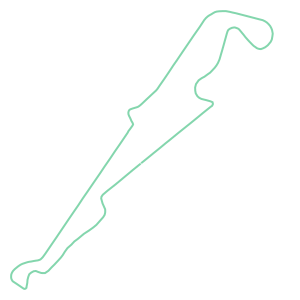

In [104]:
mlines

can print the shape object easily but can't get it onto a folium interact map.

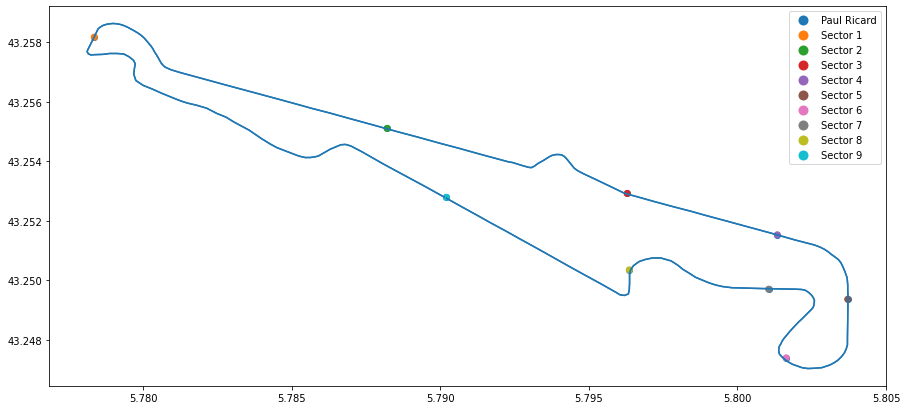

In [14]:
import matplotlib.pyplot as plt
import branca 

f = branca.element.Figure()

fig, ax = plt.subplots(1, 1, figsize=(15,12))

gdf.plot(ax=ax, legend=True)
gdf.plot(column='name', ax=ax, legend=True)


put kmh into bins to limit the number of colors applied to the line.  By not specifying the start/end of the bins this will always color in relation to the data.  For elevation later I want to only color base on whether it's a hard climb or not

In [17]:
bins = pd.cut(gdf_p2['kmh'],bins=3, labels=[1,2,3])
bins
# x = np.linspace(0, 2*np.pi, len(gdf_p2))
# print(x)
# lats = 20 * np.cos(x)
# lons = 20 * np.sin(x)
# colors = bins
colors = gdf_p2['kmh']
colors

1       16.814238
2       18.162513
3       18.254748
4       20.620444
5       23.559698
          ...    
4351    23.447690
4352    23.793180
4353    22.621556
4354    20.324151
4355    19.205742
Name: kmh, Length: 4350, dtype: float64

if we can bin categorise speed we can categorise elevation.  I think i need to divide the elevation difference by 

In [31]:
ele_bins = pd.cut(gdf_p2['ele'],bins=5, )
ele_bins
# x = np.linspace(0, 2*np.pi, len(gdf_p2))
# print(x)
# lats = 20 * np.cos(x)
# lons = 20 * np.sin(x)
# colors = bins
# ele_colors = gdf_p2['ele_bins']
# ele_colors

1       (40.44, 84.28]
2       (40.44, 84.28]
3       (40.44, 84.28]
4       (40.44, 84.28]
5       (40.44, 84.28]
             ...      
4351    (40.44, 84.28]
4352    (40.44, 84.28]
4353    (40.44, 84.28]
4354    (40.44, 84.28]
4355    (40.44, 84.28]
Name: ele, Length: 4350, dtype: category
Categories (5, interval[float64]): [(-3.619, 40.44] < (40.44, 84.28] < (84.28, 128.12] < (128.12, 171.96] < (171.96, 215.8]]

In [36]:
from folium import features

m = folium.Map([gdf.unary_union.centroid.y, gdf.unary_union.centroid.x])


color_line = features.ColorLine(
    positions=list(zip(gdf.geometry.y, gdf.geometry.x)),
    colors=gdf.index,
    colormap=['b', 'gray', 'r'],
    weight=5)

color_line.add_to(m)


m

drop time_change is it is an Object of type 'Timedelta' is not JSON serializable

To check my work I plotted gdf_line using folium. I was especially interested to see if the speed for each segment seemed in line with my own experience, so I symbolized by the mph column using folium's color mapping functionality.

In [13]:
# for i in range(1, len(gdf_points['kmh']>85)):
#     gdf_points.loc[i, 'kmh'] = gdf_points.loc[i-1, 'kmh']

In [22]:
gdf_points.loc[4195:4205]
# 4202 	-0.951163 	51.023068 	70.199997 	2020-06-16 14:37:24+00:00 	24.525683

,track_seg_point_id,ele,time,geometry,ele_change,kmh
4195,4195,78.199997,2020-06-16T14:37:10,POINT (-0.95329 51.02446),-1.600006,57.648878
4196,4196,76.800003,2020-06-16T14:37:11,POINT (-0.95335 51.02432),-1.399994,57.612588
4197,4197,75.800003,2020-06-16T14:37:12,POINT (-0.95341 51.02418),-1.000000,58.085247
4198,4198,75.000000,2020-06-16T14:37:13,POINT (-0.95347 51.02403),-0.800003,59.487023
4199,4199,74.599998,2020-06-16T14:37:14,POINT (-0.95353 51.02387),-0.400002,60.699860
4200,4200,71.800003,2020-06-16T14:37:19,POINT (-0.95370 51.02324),-2.799995,49.730250
4201,4201,70.800003,2020-06-16T14:37:22,POINT (-0.95218 51.02309),-1.000000,133.552198
4202,4202,70.199997,2020-06-16T14:37:24,POINT (-0.95116 51.02307),-0.600006,133.166000
4203,4203,69.400002,2020-06-16T14:37:27,POINT (-0.95061 51.02298),-0.799995,49.659081
4204,4204,68.199997,2020-06-16T14:37:29,POINT (-0.95039 51.02291),-1.200005,31.973948


In [47]:
import branca.colormap as cm
import math

f2 = folium.Figure(height = 400)
m2 = folium.Map([centre_lat, centre_long], zoom_start = 15)

max_kmh = math.ceil(gdf_points['kmh'].max())
linear = cm.linear.YlOrRd_04.scale(0,max_kmh)
gps_lyr = folium.GeoJson(gdf_points)
#                          style_function = lambda feature: {
#                              'color': linear(feature['properties']['kmh']),
#                              'weight': 5})       

gps_lyr.add_child
    
m2.add_child(linear)
m2.add_child(gps_lyr)
m2.add_to(f2)